<a href="https://colab.research.google.com/github/indirask28/Healthcare-Expenses-Prediction-2021/blob/main/Healthcare_Expenses_Prediction_Considering_Specific_Aspects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Anggota Kelompok**


1.   Adam Ghirvan Fadhil (205150400111026)
2.   Alief Nugroho (205150407111006)
3.   Indira Setia Kamila (205150401111037)
4.   Moch Faiz Irfannudin (195150400111004)
5.   Faishal Abyan (195150407111018)
6.   Huriyah Anisah (195150401111045)




# **Business Understanding**

Masa depan yang tidak terduga dapat memberikan efek yang tak menentu khususnya pada tubuh dan kesehatan diri. Tidak ada yang menjamin bahwa tubuh kita akan selalu sehat setiap saat, khususnya dimasa pandemi ini. Bisa jadi musibah datang disaat yang tak terduga dan membuat diri kita harus dirawat di rumah sakit. Ketidakpastian tersebut tentu akan menimbulkan rasa takut bagi sebagian orang, terutama dengan kondisi finansial yang tak menentu. Dengan adanya asuransi kesehatan dapat menjaga setiap pelanggannya dengan meringankan biaya perawatan kesehatan di rumah sakit ketika musibah datang, namun tidak semua orang mampu dan ingin dalam berlangganan asuransi kesehatan. Dataset ini dibuat bertujuan untuk membantu memprediksi total pengeluaran yang dibutuhkan dalam pemenuhan biaya kesehatan dengan memperhatikan aspek-aspek tertentu.

# **Analytic Approach**

Untuk bisa memprediksi total biaya kesehatan yang dibutuhkan untuk setiap individu, kami melakukan analisis data dengan menerapkan pendekatan **Linear Regression**. Regresi linier akan membantu proses prediksi dengan menarik garis lurus pada grafik dengan memperhatikan setiap faktor-faktor yang dijadikan variabel penentu dari penghitungan. Berikut adalah contoh grafik yang menerapkan regresi linier.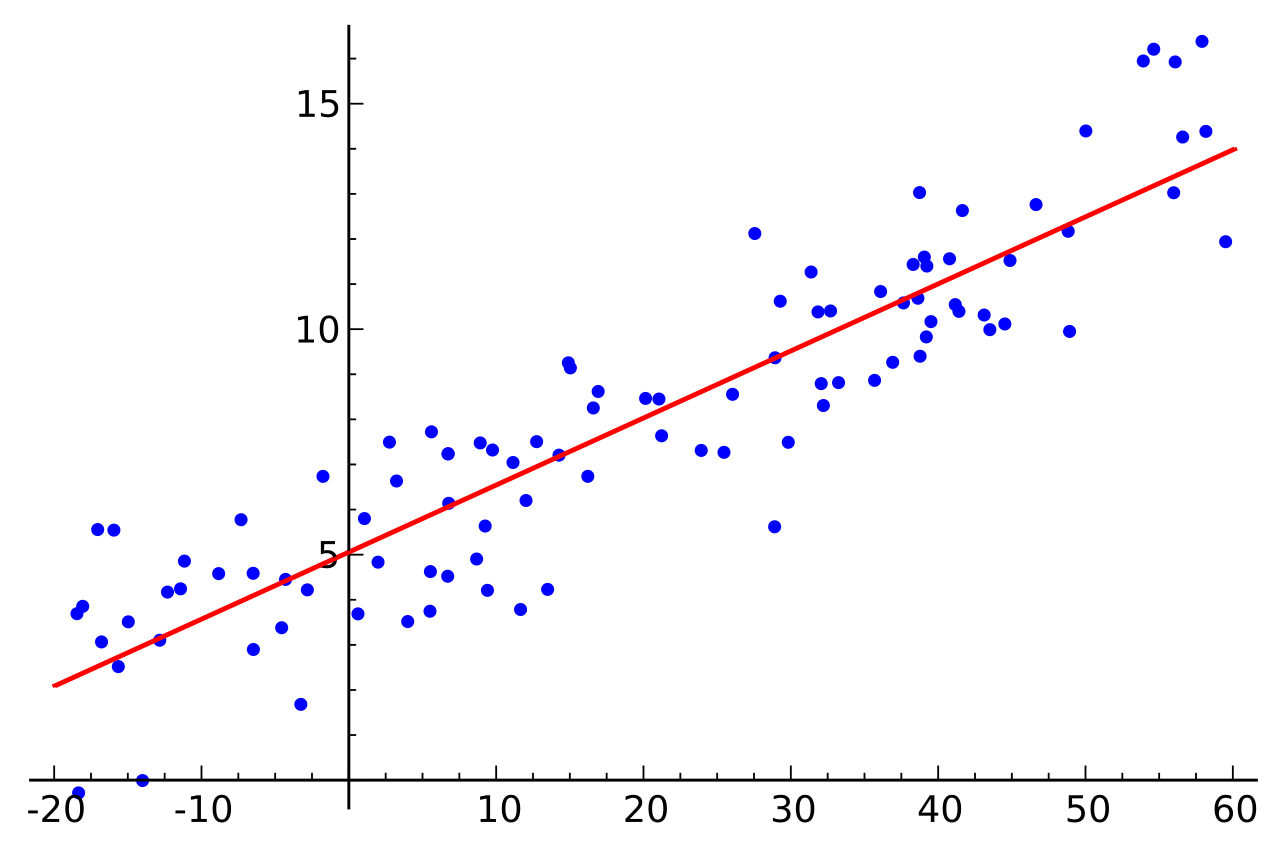

# **Data Requirements**

Seperti yang sudah dipaparkan, kami bertujuan untuk memprediksi pengeluaran biaya kesehatan di masa depan. Oleh karena itu, data-data yang kami butuhkan ialah data-data pengeluaran biaya kesehatan individu yang disertai dengan faktor penentu biayanya seperti:

*   Umur
*   Jenis kelamin
*   Kondisi merokok
*   Tempat tinggal


Dengan begitu kita bisa memproyeksikan prediksi biaya kesehatan yang ada berdaarkan data-data yang dibutuhkan.

# **Data Collection**


Dalam mencari data yang dibutuhkan, kami mencari berdasarkan requirement yang telah kami buat di platform Kaggle (https://www.kaggle.com/). Kami menemukan **dataset** yang memenuhi requirement kami yaitu **Medical Cost Personal Datasets** pada Kaggle dengan link sebagai berikut : https://www.kaggle.com/mirichoi0218/insurance.

Melakukan import library pandas ke variabel pd.

In [ ]:
import pandas as pd

Membaca data yang didapatkan dari platform Kaggle dan dimasukkan ke dalam dataframe.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

Untuk memastikan bahwa data telah terbaca dengan benar, dilakukan penampilan 5 data teratas.

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Data berhasil dibaca dan dapat dilanjutkan ke langkah selanjutnya untuk bisa diolah lebih lanjut.

# **Data Understanding**

Mendapatkan info kolom dari dataframe yang dapat dijadikan faktor dalam prediksi biaya kesehatan.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Dari output di atas, maka didapatkan faktor yang akan digunakan dalam penghitungan antara lain:
*   **Age**: umur narasumber
*   **Sex**: jenis kelamin narasumber
*   **BMI**: *Body Mass Index*, yakni nilai yang menentukan tingkat kegemukan narasumber, semakin besar nilainya maka semain gemuk.
*   **Children**: jumlah anak yang dimiliki narasumber.
*   **Smoker**: apakah narasumber merokok.
*   **Region**: daerah tempat tinggal narasumber di Amerika Serikat.
*   **Charges**: biaya kesehatan yang harus dikeluarkan.

Jumlah narasumber yang didapatkan bertotal 1338 orang.









Mendapatkan penghitungan statistik dari setiap data yang dapat dihitung.

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Mendapatkan grafik penyebaran narasumber menurut umur

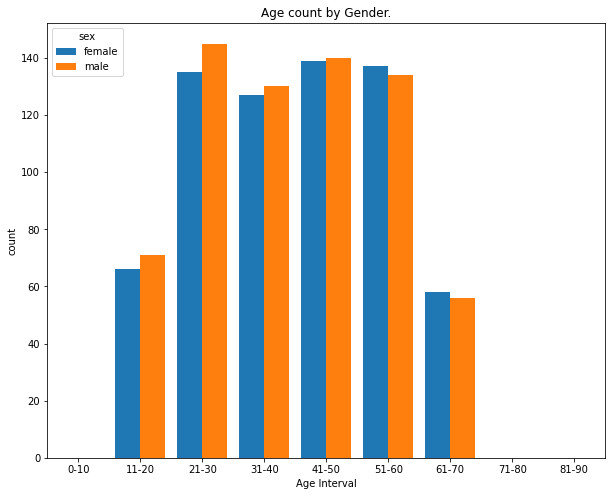

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df["age"] = df.age.astype(int)
bins = [0,10,20,30,40,50,60,70,80,90]
labels = ["0-10", "11-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90"]

df["Age Interval"] = pd.cut(df.age, labels=labels, bins = bins, right=False)

plt.figure(figsize=(10,8))
sns.countplot(x="Age Interval", hue="sex", data=df ,saturation=1.2)

plt.title("Age count by Gender.")
plt.show()

Dari grafik di atas, didapatkan bahwa narasumber yang terkumpul memiliki umur dengan kisaran 11 hingga 70 tahun.

Mendapatkan hubungan kondisi merokok, umur, dan biaya kesehatan yang harus dikeluarkan.

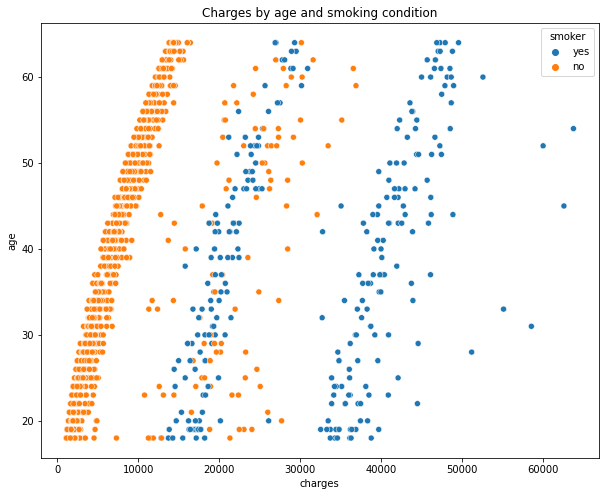

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="charges", y="age",hue="smoker", data=df)

plt.title("Charges by age and smoking condition")
plt.show()

Berdasarkan grafik tersebut dapat ditarik kesimpulan bahwa orang yang merokok mengeluarkan biaya kesehatan lebih banyak daripada yang tidak merokok.

Mendapatkan hubungan BMI, jenis kelamin, dan biaya kesehatan yang harus dikeluarkan.

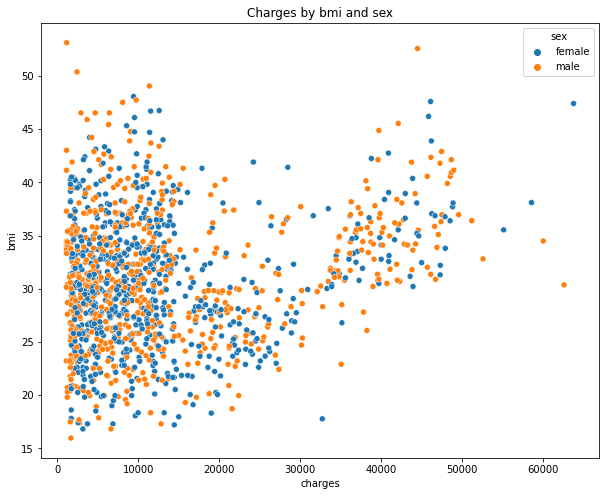

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="charges", y="bmi",hue="sex", data=df)

plt.title("Charges by bmi and sex")
plt.show()

Berdasarkan grafik tersebut dapat ditarik kesimpulan bahwa beberapa orang yang BMInya tergolong obesitas mengeluarkan biaya lebih banyak daripada orang yang BMInya normal.

Mendapatkan hubungan umur, jenis kelamin, dan biaya kesehatan yang harus dikeluarkan.

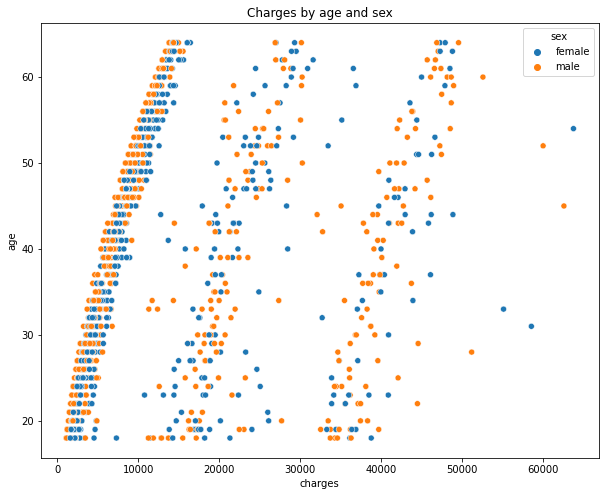

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="charges", y="age",hue="sex", data=df)

plt.title("Charges by age and sex")
plt.show()

Berdasarkan grafik tersebut dapat ditarik kesimpulan bahwa tidak ada pengaruh yang signifikan dari gender terhadap biaya kesehatan, tetapi dapat dilihat semakin menua usia seseorang semakin besar biaya kesehatannya.

Mendapatkan hubungan jumlah anak, jenis kelamin, dan biaya kesehatan yang harus dikeluarkan.

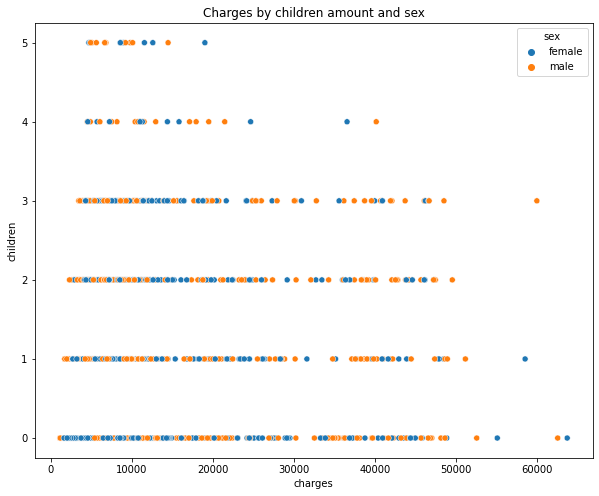

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="charges", y="children",hue="sex", data=df)

plt.title("Charges by children amount and sex")
plt.show()

Berdasarkan grafik tersebut bisa dilihat bahwa orang yang memiliki anak lebih banyak cenderung mengeluarkan sedikit untuk biaya kesehatan.

Mendapatkan hubungan daerah tempat tinggal, jenis kelamin, dan biaya kesehatan yang harus dikeluarkan.

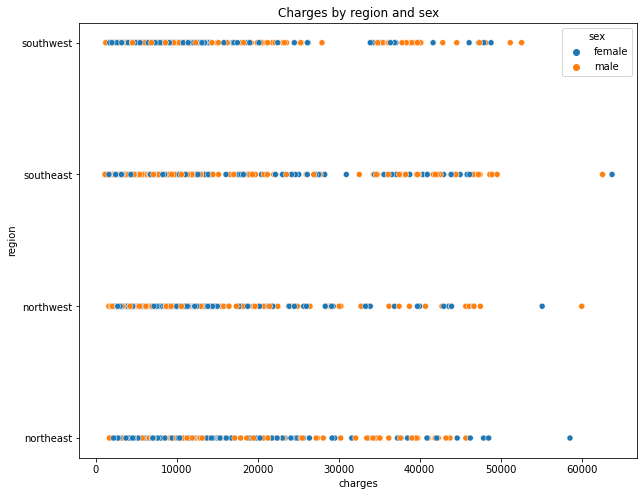

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="charges", y="region",hue="sex", data=df)

plt.title("Charges by region and sex")
plt.show()

Berdasarkan grafik tersebut dinilai tidak ada pengaruh tempat tinggal terhadap biaya kesehatan seseorang.

## Kesimpulan :
1.   Meningkatnya umur berbanding lurus dengan biaya kesehatan.
2.   Biaya kesehatan akan meningkat jika seseorang merokok.
3.   Jenis kelamin tidak memberikan pengaruh yang signifikan terhadap biaya kesehatan.
4.   Nilai BMI obesitas cenderung memiliki biaya yang lebih tinggi.
5.   Jumlah anak yang semakin banyak menyebabkan biaya kesehatan yang lebih rendah.
6.   Daerah tempat tinggal tidak terlalu berpengaruh terhadap biaya kesehatan.



# **Data Preparation**

Cleansing data, memeriksa data apakah ada yang null atau tidak.

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Dari data di atas dapat dilihat bahwa tidak ada data yang null / kosongan. Selanjutnya ingin memeriksa data kosongan berdasarkan heatmap.

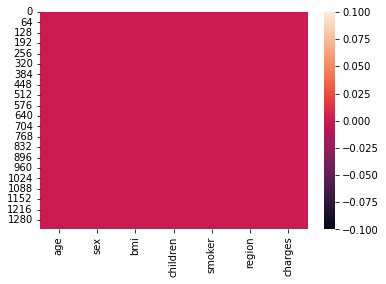

In [ ]:
import seaborn as sns

sns.heatmap(df.isnull())

Berdasarkan heatmap di atas dapat dipastikan juga tidak ada data yang kosong. Selanjutnya kita juga ingin memastikan data yang hilang menggunakan persentase.

In [ ]:
missing_val_per = (df.isnull().sum() / df.shape[0] ) * 100
missing_val_per

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

Berdasarkan hasil di atas, semua data memiliki persentase 0% data hilang.

Untuk tahap selanjutnya kami ingin memeriksa apakah ada outlier pada data yang kami miliki menggunakan Z-Score method.

In [ ]:
import numpy as np
def outlier_zscore(data):
    global outliers,zscore
    outliers = []
    zscore = []
    threshold = 3.5
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score= (i - mean)/std
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return len(outliers), outliers

Pertama, kami ingin mendeteksi outlier pada variabel age.

The number of outliers are 0


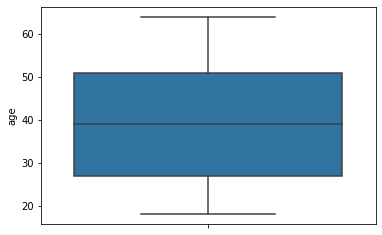

In [ ]:
age_outliers_number, age_outliers = outlier_zscore(df.age)
if(age_outliers_number == 0) :
  print("The number of outliers are 0")
else :
  print(f"The number of outliers are {age_outliers_number} and the outliers are {age_outliers}")
sns.boxplot(y = 'age', data = df)

Dapat dipastikan tidak terdapat outlier pada variabel age. Oleh karena itu, belum ada data yang dihapus.

Kedua, kami memeriksa outlier pada variabel BMI.

The number of outliers are 2 and the outliers are [0.0, 0.0]


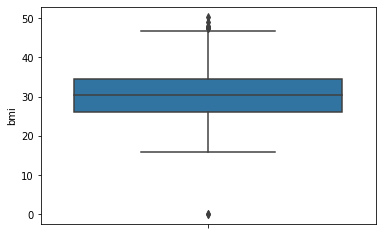

In [ ]:
bmi_outliers_number, bmi_outliers = outlier_zscore(df.bmi)
if(bmi_outliers_number == 0) :
  print("The number of outliers are 0")
else :
  print(f"The number of outliers are {bmi_outliers_number} and the outliers are {bmi_outliers}")
sns.boxplot(y = 'bmi', data = df)

Pada variabel BMI, terdapat 2 data outlier. Maka dari itu kedua data tersebut perlu kita hapus.

The number of outliers are 2 and the outliers are [0.0, 0.0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


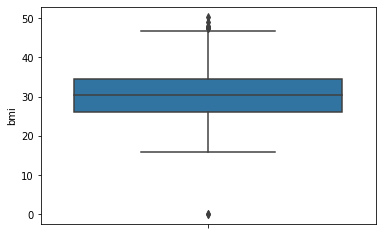

In [ ]:
for num, i in enumerate(df['bmi']):
    if i in bmi_outliers:
        df['bmi'][num] = 0

bmi_outliers_number, bmi_outliers = outlier_zscore(df.bmi)
if(bmi_outliers_number == 0) :
  print("The number of outliers are 0")
else :
  print(f"The number of outliers are {bmi_outliers_number} and the outliers are {bmi_outliers}")
sns.boxplot(y = 'bmi', data = df)

Dengan begini, data outlier pada variabel BMI berhasil dibersihkan.

Ketiga, kami memeriksa data outlier pada children.

The number of outliers are 0


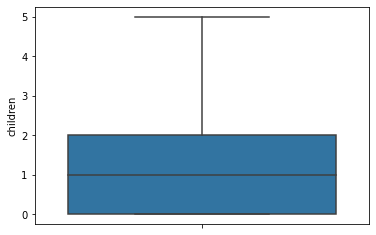

In [ ]:
children_outliers_number, children_outliers = outlier_zscore(df.children)
if(children_outliers_number == 0) :
  print("The number of outliers are 0")
else :
  print(f"The number of outliers are {children_outliers_number} and the outliers are {children_outliers}")
sns.boxplot(y = 'children', data = df)

Dapat dipastikan tidak terdapat outlier pada variabel children. Oleh karena itu, belum ada data yang dihapus.

Keempat, kami memeriksa data outlier pada variabel charges.

The number of outliers are 0


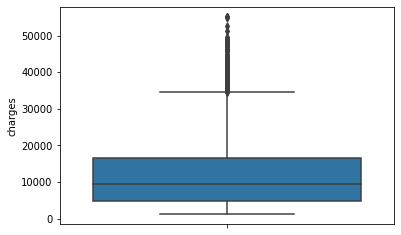

In [ ]:
charges_outliers_number, charges_outliers = outlier_zscore(df.charges)
if(charges_outliers_number == 0) :
  print("The number of outliers are 0")
else :
  print(f"The number of outliers are {charges_outliers_number} and the outliers are {charges_outliers}")
sns.boxplot(y = 'charges', data = df)

Pada variabel charges terdapat 4 data outlier. Maka dari itu, data tersebut perlu dihapus.

The number of outliers are 0


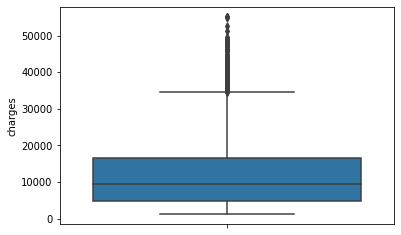

In [ ]:
for num, i in enumerate(df['charges']):
    if i in charges_outliers:
        df['charges'][num] = 55000.00000

charges_outliers_number, charges_outliers = outlier_zscore(df.charges)
if(charges_outliers_number == 0) :
  print("The number of outliers are 0")
else :
  print(f"The number of outliers are {charges_outliers_number} and the outliers are {charges_outliers}")
sns.boxplot(y = 'charges', data = df)

Dengan begini, data outlier pada charges berhasil dihapus.

## Label Encoding

Tahap terakhir pada data preparation adalah label encoding. Label encoding bertujuan menyederhanakan data khususnya data variabel yang memiliki value sama seperti jenis kelamin(laki-laki dan perempuan). Dengan label encoding ini proses data modelling akan lebih mudah.

Pada kasus ini, kami memutuskan mengencode variabel sex, smoker dan region karena hasil analisis kami variabel tersebut memiliki value yang sama.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Tabel di atas merupakan hasil dari label encoding kami.

# **Data Modelling**

Berdasarkan Analytic Approach yang kami pilih yaitu Regression Analysis. Pertama-tama kami mempersiapkan 2 variabel yang akan diproses.



In [ ]:
x = df.iloc[ : , : -1]
y = df.iloc[ : , -1]

x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [ ]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

Pada variabel x kami menampung 6 variabel yang mempengaruhi biaya kesehatan seseorang. Variabel y menampung variabel charges yang mana merupakan biaya kesehatan seseorang.

Tahap selanjutnya kami ingin memisahkan dataset menjadi 2 kategori yaitu train dan test data.

In [ ]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x, y, test_size = 0.2 , random_state = 51)

print(" Shape of x_train = ", x_train.shape)
print(" Shape of x_test = ", x_test.shape)
print(" Shape of y_train = ", y_train.shape)
print(" Shape of y_test = ", y_test.shape)

 Shape of x_train =  (1070, 6)
 Shape of x_test =  (268, 6)
 Shape of y_train =  (1070,)
 Shape of y_test =  (268,)


Selanjutnya, kami ingin menormalisasikan data / menetapkan standar pada data menggunakan feature scaling.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

x_train

array([[-0.01679025, -1.00187091, -1.09450226,  3.22869711, -0.50145986,
         0.44715758],
       [ 1.46855153,  0.99813258,  1.53925297, -0.90867523,  1.99417757,
         1.36024652],
       [-0.93628753,  0.99813258, -0.5366982 ,  1.57374817, -0.50145986,
        -1.37902031],
       ...,
       [-0.58263473, -1.00187091,  0.08764801, -0.90867523, -0.50145986,
        -1.37902031],
       [-1.50213202,  0.99813258,  0.18869352,  0.7462737 ,  1.99417757,
         0.44715758],
       [ 0.54905424,  0.99813258,  0.91162072, -0.08120077,  1.99417757,
         0.44715758]])

In [ ]:
x_test

array([[ 0.6197848 ,  0.99813258, -0.13662372, -0.90867523, -0.50145986,
         0.44715758],
       [ 1.46855153,  0.99813258,  0.37271135, -0.90867523,  1.99417757,
         1.36024652],
       [-1.07774866, -1.00187091, -0.46194096, -0.90867523, -0.50145986,
         0.44715758],
       ...,
       [-1.43140146,  0.99813258, -0.04625782, -0.90867523,  1.99417757,
         0.44715758],
       [ 1.61001265,  0.99813258,  0.24373457, -0.90867523,  1.99417757,
        -1.37902031],
       [ 1.18562929, -1.00187091,  0.29056053,  1.57374817, -0.50145986,
        -1.37902031]])

Data sudah distandarkan, selanjutnya lanjut pembuatan model.

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

print("Intercept : " , lr.intercept_)
print("Slope : " , lr.coef_)

Intercept :  13118.329862316823
Slope :  [3474.17920448  -78.39777554 1745.01553884  616.85069344 9508.8239903
 -398.38329177]


Dari hasil di atas dapat dilihat kapan data bersinggungan dan kemiringan data.

# **Model Evaluation**

Model data berhasil dibuat, selanjutnya kita akan mengevaluasi model apakah berhasil memprediksi dan bagaimana R2 Score dari model.

In [ ]:
y_pred = lr.predict(x_test)
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted Values" ])
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real Values"])
pd.concat([y_test_df , y_pred_df] , axis=1)

,Real Values,Predicted Values
0,7789.63500,9447.960866
1,52590.82939,36652.343869
2,2464.61880,3139.537617
3,8964.06055,11186.214869
4,39556.49450,33906.632001
...,...,...
263,6610.10970,12025.816389
264,18648.42170,28045.793399
265,32548.34050,26210.039164
266,45710.20785,38010.016803


Di atas merupakan hasil prediksi dari model yang sudah dibuat. Anggaplah data pada index 0 bernama Adam, Adam pada tahun ini memiliki tagihan kesehatan 7789 dollar. Diperkirakan dengan variabel yang dimiliki adam seharusnya tagihan kesehatannya di tahun depan adalah 9447 dollar.

Terakhir, kita akan memeriksa metriks kepercayaan terhadap model yang telah dibuat berdasarkan R2 Score dari model.

In [ ]:
from sklearn.metrics import r2_score , mean_squared_error
score = r2_score(y_test , y_pred)
print("R2 Score : {}".format(score))
print("Model Accuracy: {}%".format(score * 100))

R2 Score : 0.7530613099793504
Model Accuracy: 75.30613099793504%


Berdasarkan hasil perhitungan R2 Score yang ada, dapat disimpulkan bahwa hasil dari penelitian data sains terhadap tagihan kesehatan seseorang menggunakan pendekatan regresi linier memiliki akurasi model sebesar 75%.